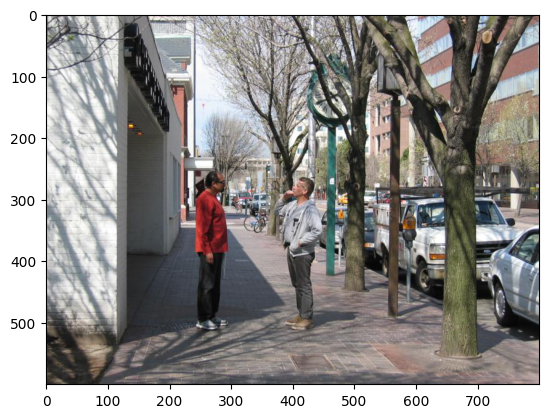

In [ ]:
%reload_ext autoreload
%autoreload 2


from matplotlib import pyplot as plt
from matplotlib import image as mpimg

# Load the image
image_path = "crepe_data/VG_100K/1.jpg"
image = mpimg.imread(image_path)

# plt.title("Sheep Image")
# plt.xlabel("X pixel scaling")
# plt.ylabel("Y pixel scaling")
plt.imshow(image)
plt.show()

In [ ]:
img_caption_file_name="crepe_data/prod_hard_negatives/prod_vg_hard_negs_swap_all.csv"

import pandas as pd
 
caption_pd = pd.read_csv(img_caption_file_name)

In [ ]:
print(caption_pd.iloc[0]['caption'], caption_pd.iloc[1]['image_id'])
print(caption_pd.iloc[3]['caption'], caption_pd.iloc[3]['image_id'])

a car parked on a street next to a tree. the street has a parking meter and a lamp post. there are bikes near the tree. 5
a glass of water on a counter with an apple, a bag of food, and a chair with a leg. 6


In [ ]:
from image_utils import load_crepe_datasets, load_other_crepe_images
import os

import IPython

data_path="/data2/wuyinjun/"
query_path=os.getcwd() #curr_dir = str(globals()["_dh"][0])
dataset_name="crepe"
full_data_path = os.path.join(data_path, dataset_name)

queries, raw_img_ls, sub_queries_ls, img_idx_ls = load_crepe_datasets(full_data_path, query_path)
img_idx_ls, raw_img_ls = load_other_crepe_images(full_data_path, query_path, img_idx_ls, raw_img_ls)

/data6/wuyinjun/anaconda3/envs/test/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import torch
from transformers import CLIPModel, AutoProcessor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# processor = ViTImageProcessor.from_pretrained('google/vit-large-patch16-224')
# model = ViTForImageClassification.from_pretrained('google/vit-large-patch16-224').to(device)
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14").to(device)
# processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")
raw_processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")
# processor =  lambda images: raw_processor(images=images, return_tensors="pt", padding=False, do_resize=False, do_center_crop=False)["pixel_values"]
processor =  lambda images: raw_processor(images=images, return_tensors="pt")["pixel_values"]
text_processor =  lambda text: raw_processor(text=[text], return_tensors="pt", padding=True, truncation=True)
img_processor =  lambda images: raw_processor(images=images, return_tensors="pt")["pixel_values"]
model = model.eval()

2024-05-26 05:16:58.431396: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-26 05:16:59.124180: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
from image_utils import *

new_raw_img_ls = [raw_img_ls[idx] for idx in range(10)]

cl = ConceptLearner(new_raw_img_ls, model, vit_forward, processor, dataset_name, device)

patch_count=4

img_emb, patch_emb, masks, bboxes, img_per_patch = cl.get_patches(patch_count, images=new_raw_img_ls, method="slic", compute_img_emb=True)

# img_emb, patch_emb_ls, masks_ls, bboxes_ls, img_per_patch_ls = convert_samples_to_concepts(args, model, raw_img_ls, processor, device, patch_count_ls=patch_count_ls)




100%|██████████| 10/10 [00:00<00:00, 206.95it/s]

Loading cached patches
e4d314ebb7e487f77f4cb2c5b995c55c486cf3a5


# plot decomposed images

3


/data6/wuyinjun/anaconda3/envs/test/lib/python3.8/site-packages/ipyplot/_utils.py:95: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))



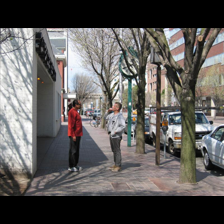
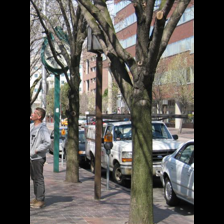
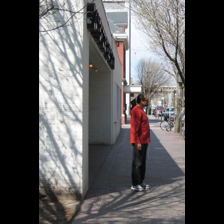


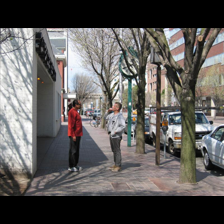
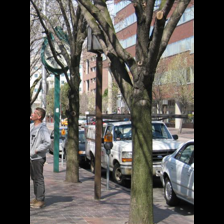
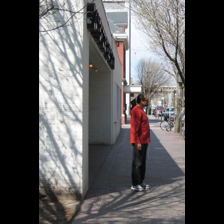

In [ ]:
import matplotlib.pyplot as plt
import cv2
import PIL
import ipyplot

image_id = 0

first_mask = masks[image_id]

# print(len(first_mask))

first_img = raw_img_ls[image_id]

first_bbox_ls = bboxes[image_id]

print(len(first_bbox_ls))

masked_image_ls = []

for idx in range(len(first_bbox_ls)):
    first_bbox = first_bbox_ls[idx]
    # masked_image = np.copy(first_img)
    # # print(masked_image.shape)
    # masked_image[first_mask != (idx + 1)] = 255 # Set pixels outside the mask to 0
    curr_patch = PIL.Image.new('RGB', first_img.size)
    curr_patch.paste(first_img.copy().crop(first_bbox), box=first_bbox)
    masked_image = PIL.ImageOps.pad(curr_patch.crop(first_bbox), (224, 224))
    masked_image_ls.append(masked_image)


ipyplot.plot_images(masked_image_ls, max_images=len(first_bbox_ls))   


# masked_image = cv2.rectangle(Image.fromarray(masked_image), (first_bbox[0], first_bbox[1]), (first_bbox[2], first_bbox[3]), (255, 0, 0), 2)

# Display the masked part of the image
# plt.imshow(masked_image)
# plt.axis('off')
# plt.show()

# print(np.unique(first_mask))

3



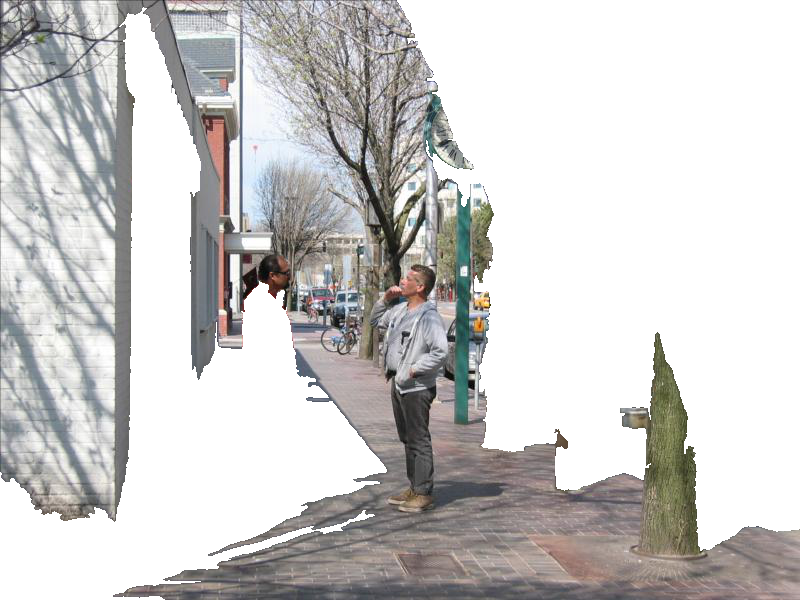
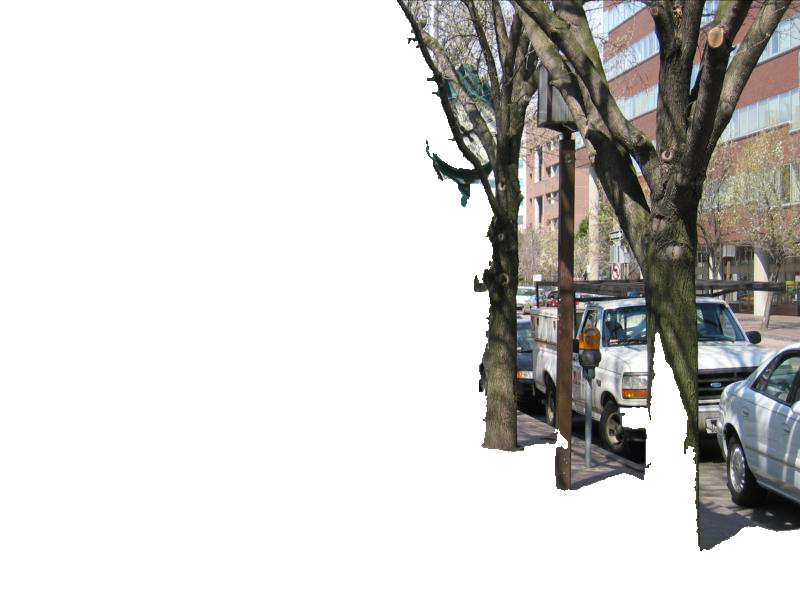
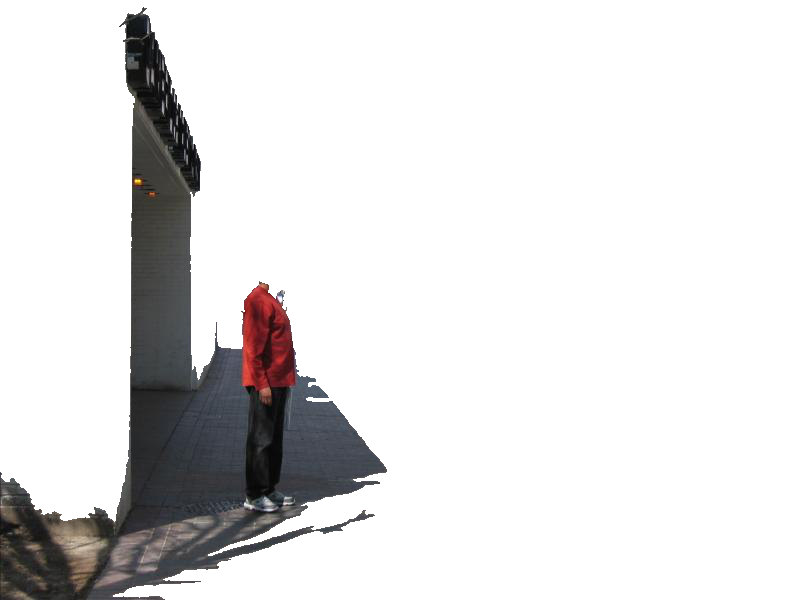


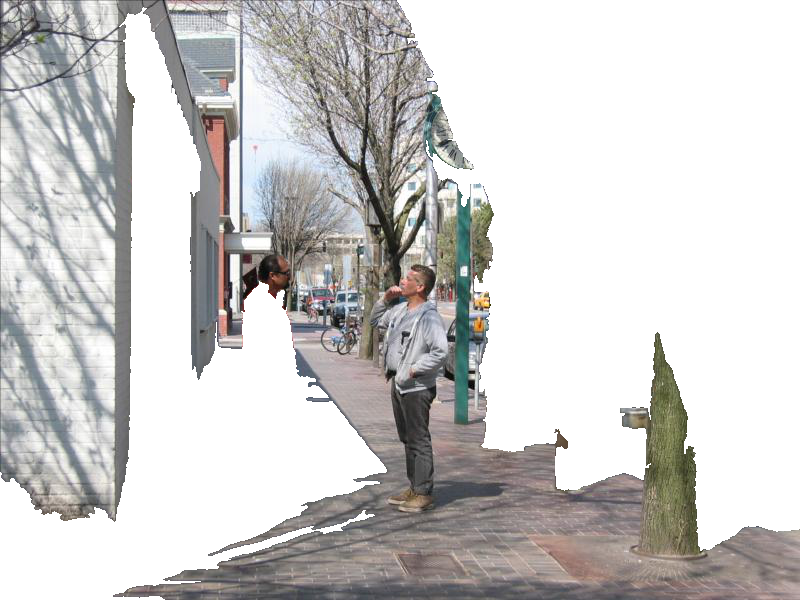
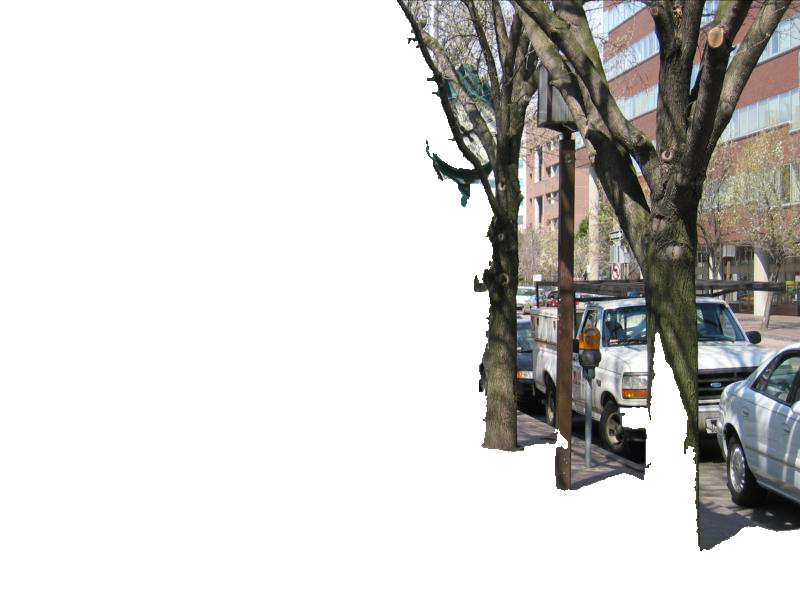
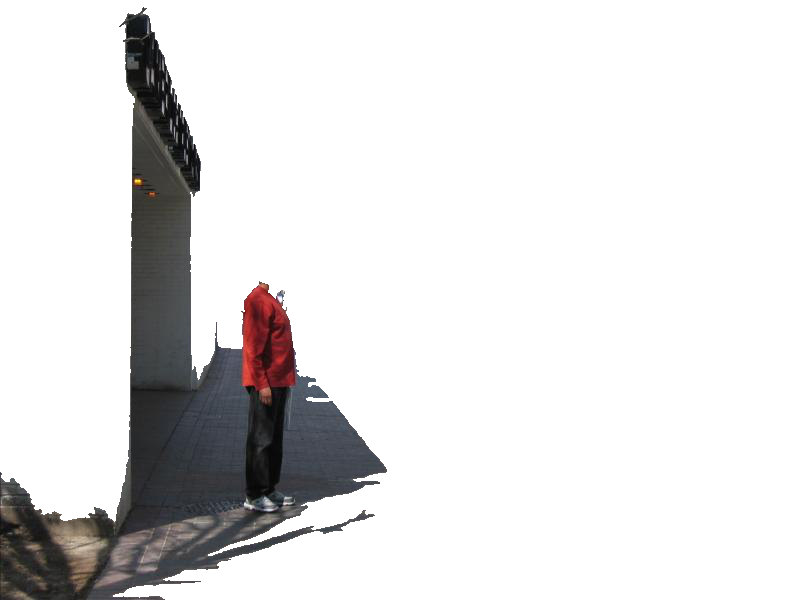

In [ ]:
import matplotlib.pyplot as plt
import cv2
import PIL
import ipyplot

image_id = 0

first_mask = masks[image_id]

# print(len(first_mask))

first_img = raw_img_ls[image_id]

first_bbox_ls = bboxes[image_id]

print(len(first_bbox_ls))

masked_image_ls = []

for idx in range(len(first_bbox_ls)):
    first_bbox = first_bbox_ls[idx]
    masked_image = np.copy(first_img)
    # print(masked_image.shape)
    masked_image[first_mask != (idx + 1)] = 255 # Set pixels outside the mask to 0
    # curr_patch = PIL.Image.new('RGB', first_img.size)
    # curr_patch.paste(first_img.copy().crop(first_bbox), box=first_bbox)
    # masked_image = PIL.ImageOps.pad(curr_patch.crop(first_bbox), (224, 224))
    masked_image_ls.append(masked_image)


ipyplot.plot_images(masked_image_ls, max_images=len(first_bbox_ls))   


# masked_image = cv2.rectangle(Image.fromarray(masked_image), (first_bbox[0], first_bbox[1]), (first_bbox[2], first_bbox[3]), (255, 0, 0), 2)

# Display the masked part of the image
# plt.imshow(masked_image)
# plt.axis('off')
# plt.show()

# print(np.unique(first_mask))